<a href="https://colab.research.google.com/github/ARGF0RCE/tinyml-course-assignments/blob/origin/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 Solution

## Implementing Regression Using a Single-Layer Neural Network

### Introduction
In this part, we will implement a simple regression model using a single-layer neural network. Regression is a type of supervised learning where the goal is to predict a continuous output variable based on one or more input variables. We'll use a basic neural network with one input layer and one output layer to learn the relationship between our input data \(x\) and output data \(y\).

### Step 1: Importing Libraries
First, we need to import the necessary libraries. We will use NumPy for data manipulation, Matplotlib for plotting, and TensorFlow/Keras for building the neural network.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Step 2: Generating the Data
Let's create a simple dataset where \(y\) is a function of \(x\). For demonstration purposes, we'll use a linear relationship with some added noise.

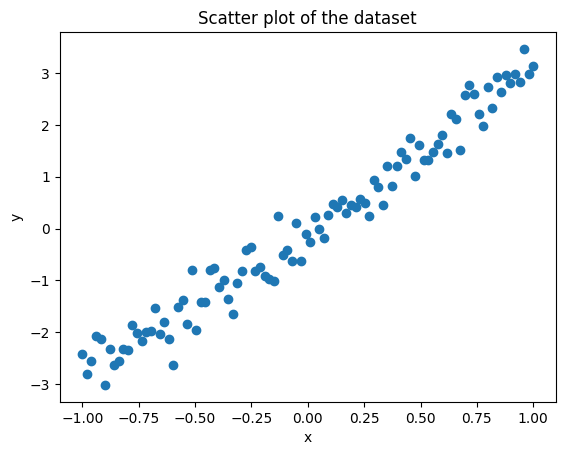

In [2]:
# Generating data
np.random.seed(0)
x = np.linspace(-1, 1, 100)
y = 3 * x + np.random.randn(*x.shape) * 0.33  # y = 3x + noise

# Plotting the data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of the dataset')
plt.show()

### Step 3: Preparing the Data
We need to reshape the input data to fit the neural network model. The input data should be a 2D array where each row represents a single sample.


In [3]:
x = x.reshape(-1, 1)

### Step 4: Building the Model
We will use the Sequential API from Keras to build our model. Since it's a single-layer neural network, we will use one Dense layer with one neuron. The activation function will be linear, as we are performing regression.


In [4]:
# Building the model
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

# Compiling the model
model.compile(optimizer='sgd', loss='mean_squared_error')

### Step 5: Training the Model
We will train the model using the `fit` method. We need to specify the number of epochs, which determines how many times the model will see the entire dataset.

In [5]:
# Training the model
model.fit(x, y, epochs=100, verbose=1)

Epoch 1/100
4/4 [==============================] - 3s 11ms/step - loss: 6.6238
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 6.2896
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 5.9281
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 5.6262
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 5.3342
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 5.0597
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 4.7705
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 4.5374
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 4.3013
Epoch 10/100
4/4 [==============================] - 0s 13ms/step - loss: 4.0562
Epoch 11/100
4/4 [==============================] - 0s 7ms/step - loss: 3.8607
Epoch 12/100
4/4 [==============================] - 0s 10ms/step - loss: 3.6513
Epoch 13/100
4/4 [==============================] - 0s 1

### Step 6: Evaluating the Model
After training, we can evaluate the model by making predictions on the training data and plotting the results.

4/4 [==============================] - 0s 3ms/step


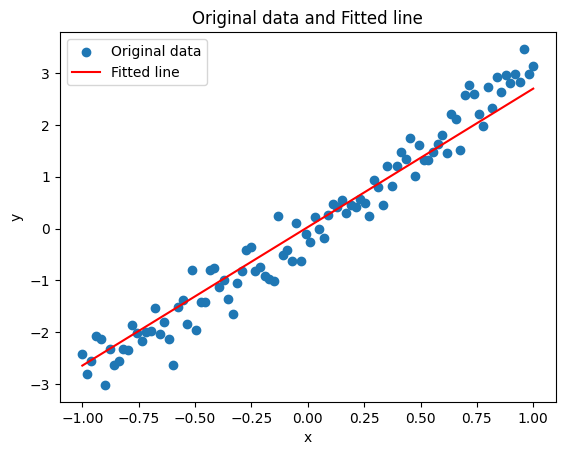

In [6]:
# Making predictions
y_pred = model.predict(x)

# Plotting the results
plt.scatter(x, y, label='Original data')
plt.plot(x, y_pred, color='red', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original data and Fitted line')
plt.legend()
plt.show()

### Conclusion
In the above section, we implemented a simple regression model using a single-layer neural network. We generated a dataset, built and trained a neural network model, and evaluated its performance. This example demonstrates the basic steps involved in using neural networks for regression tasks.

## Implementing Multiclass Classification Using Dense Neural Network on Fashion-MNIST Dataset

### Step 1: Importing Libraries
We will use NumPy for data manipulation, Matplotlib for plotting, and TensorFlow/Keras for building and training the neural network. We will also use gzip for extracting the dataset files.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import gzip
import os
from urllib import request

### Step 2: Downloading and Extracting the Data

The Fashion-MNIST dataset is available in gzip format. We will download and extract the files.

In [8]:
# URLs for the dataset
base_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/'
files = {
    'train_images': 'train-images-idx3-ubyte.gz',
    'train_labels': 'train-labels-idx1-ubyte.gz',
    'test_images': 't10k-images-idx3-ubyte.gz',
    'test_labels': 't10k-labels-idx1-ubyte.gz'
}

# Function to download and extract files
def download_and_extract(file_key):
    file_path = files[file_key]
    local_file_path = file_key + '.gz'
    if not os.path.exists(local_file_path):
        print(f'Downloading {file_path}...')
        request.urlretrieve(base_url + file_path, local_file_path)
    with gzip.open(local_file_path, 'rb') as f:
        return f.read()

# Load the dataset
train_images = download_and_extract('train_images')
train_labels = download_and_extract('train_labels')
test_images = download_and_extract('test_images')
test_labels = download_and_extract('test_labels')

### Step 3: Preparing the Data

We need to convert the raw bytes into NumPy arrays and preprocess the data.

In [9]:
def parse_images(raw):
    # The first 16 bytes contain metadata, followed by the image data
    data = np.frombuffer(raw, dtype=np.uint8, offset=16)
    return data.reshape(-1, 28, 28) / 255.0  # Normalize pixel values

def parse_labels(raw):
    # The first 8 bytes contain metadata, followed by the label data
    return np.frombuffer(raw, dtype=np.uint8, offset=8)

train_images = parse_images(train_images)
train_labels = parse_labels(train_labels)
test_images = parse_images(test_images)
test_labels = parse_labels(test_labels)

### Step 4: Building the Model

We will build a neural network with several dense layers. The input layer will flatten the 28x28 images, and the output layer will have 10 neurons (one for each class) with a softmax activation function.

In [10]:
# Building the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Step 5: Training the Model

We will train the model using the fit method. We need to specify the number of epochs and the batch size.

In [11]:
# Training the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5215 - accuracy: 0.8162 - val_loss: 0.4188 - val_accuracy: 0.8488
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3817 - accuracy: 0.8612 - val_loss: 0.3893 - val_accuracy: 0.8580
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3425 - accuracy: 0.8741 - val_loss: 0.3763 - val_accuracy: 0.8627
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3203 - accuracy: 0.8807 - val_loss: 0.3440 - val_accuracy: 0.8730
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2991 - accuracy: 0.8895 - val_loss: 0.3217 - val_accuracy: 0.8833
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2835 - accuracy: 0.8934 - val_loss: 0.3297 - val_accuracy: 0.8820
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2729 - accuracy: 0.8986 - val_loss: 0.3495 - val_accuracy:

### Step 6: Evaluating the Model

After training, we can evaluate the model on the test data.

In [12]:
# Evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3818 - accuracy: 0.8713
Test accuracy: 0.8712999820709229


### Step 7: Making Predictions

We can use the trained model to make predictions on new data.

313/313 [==============================] - 1s 2ms/step


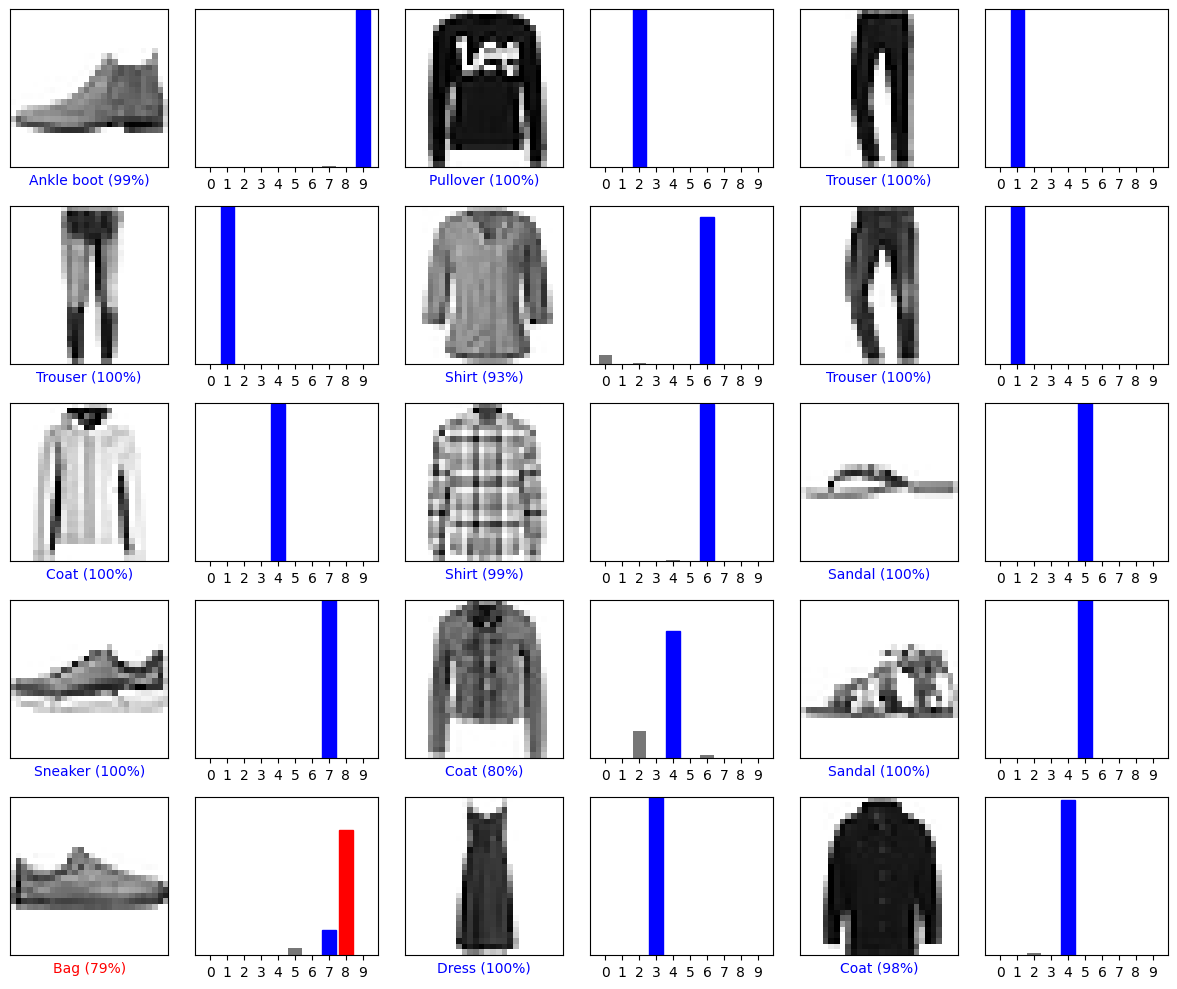

In [14]:
# Making predictions
predictions = model.predict(test_images)

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]


# Plotting a few predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f'{class_names[predicted_label]} ({100*np.max(predictions_array):2.0f}%)', color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()

### Conclusion
In this guide, we implemented a multiclass classification model using a dense neural network on the Fashion-MNIST dataset. We downloaded and extracted the dataset, preprocessed the data, built and trained the model, and evaluated its performance. This example demonstrates the basic steps involved in using neural networks for multiclass classification tasks.

#### References
- [Fashion-MNIST GitHub Repository](https://github.com/zalandoresearch/fashion-mnist)
- [Direct Download Links for Fashion-MNIST Dataset](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/)